# Importing Libraries

In [251]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [252]:
df = pd.read_csv('risk_factor_surveillance_database.csv')
df

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Total,Total,OVR,OVERALL
1,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Male,GEN,MALE
2,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Female,GEN,FEMALE
3,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,Less than high school,EDU,EDUHS
4,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,High school graduate,EDU,EDUHSGRAD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53387,2016,2016,VI,Virgin Islands,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,"(18.335765, -64.896335)",PA,PA1,Q047,VALUE,78,Race/Ethnicity,Asian,RACE,RACEASN
53388,2016,2016,VI,Virgin Islands,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,"(18.335765, -64.896335)",PA,PA1,Q047,VALUE,78,Race/Ethnicity,Hawaiian/Pacific Islander,RACE,RACEHPI
53389,2016,2016,VI,Virgin Islands,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,"(18.335765, -64.896335)",PA,PA1,Q047,VALUE,78,Race/Ethnicity,American Indian/Alaska Native,RACE,RACENAA
53390,2016,2016,VI,Virgin Islands,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,"(18.335765, -64.896335)",PA,PA1,Q047,VALUE,78,Race/Ethnicity,2 or more races,RACE,RACE2PLUS


# Removing rows with no sample sizes.

In [253]:
df.drop(df[df['Data_Value_Footnote_Symbol'] == '~'].index, inplace=True)

# Dropping Unnecessary Columns

In [254]:
df = df.drop(
    ['YearEnd', 'LocationDesc', 'LocationDesc', 'ClassID', 'TopicID', 'DataValueTypeID',
     'StratificationCategoryId1', 'Stratification1', 'StratificationCategory1', 'Data_Value_Footnote', 'Data_Value_Footnote_Symbol', 'Data_Value_Alt', 'Data_Value_Type', 'Data_Value_Unit', 'Question', 'Topic', 'Class', 'LocationAbbr', 'Datasource', 'GeoLocation', 
     'Low_Confidence_Limit', 'High_Confidence_Limit '], 
    axis=1)
df

,YearStart,Data_Value,Sample_Size,Total,Age(years),Education,Gender,Income,Race/Ethnicity,QuestionID,LocationID,StratificationID1
0,2011,32.0,7304.0,Total,NaN,NaN,NaN,NaN,NaN,Q036,1,OVERALL
1,2011,32.3,2581.0,NaN,NaN,NaN,Male,NaN,NaN,Q036,1,MALE
2,2011,31.8,4723.0,NaN,NaN,NaN,Female,NaN,NaN,Q036,1,FEMALE
3,2011,33.6,1153.0,NaN,NaN,Less than high school,NaN,NaN,NaN,Q036,1,EDUHS
4,2011,32.8,2402.0,NaN,NaN,High school graduate,NaN,NaN,NaN,Q036,1,EDUHSGRAD
...,...,...,...,...,...,...,...,...,...,...,...,...
53382,2016,13.3,212.0,NaN,NaN,NaN,NaN,"$75,000 or greater",NaN,Q047,78,INC75PLUS
53383,2016,25.3,137.0,NaN,NaN,NaN,NaN,Data not reported,NaN,Q047,78,INCNR
53384,2016,18.3,154.0,NaN,NaN,NaN,NaN,NaN,Non-Hispanic White,Q047,78,RACEWHT
53385,2016,24.1,820.0,NaN,NaN,NaN,NaN,NaN,Non-Hispanic Black,Q047,78,RACEBLK


# Getting obesity data

In [255]:
obesity_df = df.loc[(df.QuestionID == 'Q036') | (df.QuestionID == 'Q037')]
obesity_df = obesity_df.drop(['StratificationID1', 'QuestionID'], axis=1)
obesity_df

,YearStart,Data_Value,Sample_Size,Total,Age(years),Education,Gender,Income,Race/Ethnicity,LocationID
0,2011,32.0,7304.0,Total,NaN,NaN,NaN,NaN,NaN,1
1,2011,32.3,2581.0,NaN,NaN,NaN,Male,NaN,NaN,1
2,2011,31.8,4723.0,NaN,NaN,NaN,Female,NaN,NaN,1
3,2011,33.6,1153.0,NaN,NaN,Less than high school,NaN,NaN,NaN,1
4,2011,32.8,2402.0,NaN,NaN,High school graduate,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...
51842,2016,32.6,206.0,NaN,NaN,NaN,NaN,"$75,000 or greater",NaN,78
51843,2016,31.8,106.0,NaN,NaN,NaN,NaN,Data not reported,NaN,78
51844,2016,21.3,148.0,NaN,NaN,NaN,NaN,NaN,Non-Hispanic White,78
51845,2016,34.3,783.0,NaN,NaN,NaN,NaN,NaN,Non-Hispanic Black,78


# Checking Data_Value and Sample_Size distribution

count    16254.000000
mean        31.927925
std          6.627183
min          0.900000
25%         28.200000
50%         32.800000
75%         36.500000
max         60.400000
Name: Data_Value, dtype: float64
Upper Band:  48.95
Lower Band:  15.749999999999998


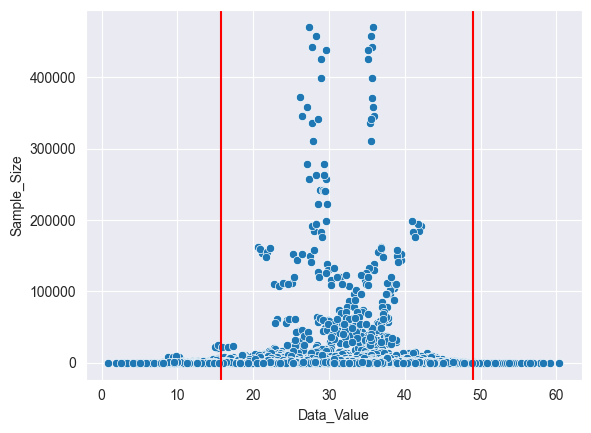

In [256]:
print(obesity_df['Data_Value'].describe())
sns.scatterplot(x=obesity_df['Data_Value'], y=obesity_df['Sample_Size'])

# Getting IQR Range
q1 = np.percentile(obesity_df['Data_Value'], 25, method='midpoint')
q3 = np.percentile(obesity_df['Data_Value'], 75, method='midpoint')
IQR = q3 - q1
upper = q3 + 1.5 * IQR
lower = q1 - 1.5 * IQR
print('Upper Band: ', upper)
print('Lower Band: ', lower)

plt.axvline(x=upper, color='r')
plt.axvline(x=lower, color='r')

# Removing Outliers

In [257]:
obesity_df = obesity_df[(obesity_df['Data_Value']<=upper) & (obesity_df['Data_Value']>=lower)]

# Testing Label and Ordinal Encoding

In [258]:
# XGBoost handles NaN values itself so no need to handle them.

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

obesity_df_1 = obesity_df.copy()
label_encoder = LabelEncoder()
ordinal_encoder = OrdinalEncoder()
ordinal_columns = ['Age(years)', 'YearStart', 'Education', 'Income']
label_columns = ['Gender', 'Race/Ethnicity', 'Total']

for col in ordinal_columns:
    obesity_df_1[col] = ordinal_encoder.fit_transform(obesity_df_1[col].to_numpy().reshape(-1, 1))
    
for col in label_columns:
    obesity_df_1[col] = label_encoder.fit_transform(obesity_df_1[col])

In [259]:
x = obesity_df_1.drop('Data_Value', axis=1)
y = obesity_df_1['Data_Value']
my_model = XGBRegressor(tree_method='gpu_hist')
scores = -1 * cross_val_score(my_model, x, y, cv=10, scoring='neg_mean_squared_error')
print('MSE: ',scores.mean())

MSE:  31.64915639582413


# Testing One-Hot Encoder

In [260]:
obesity_df_2 = obesity_df.copy()
obesity_df_2 = pd.get_dummies(data=obesity_df_2, columns=['Total','Age(years)','Education','Gender','Income','Race/Ethnicity', 'YearStart'], dtype=int)

In [261]:
x = obesity_df_2.drop('Data_Value', axis=1)
y = obesity_df_2['Data_Value']

my_model_2 = XGBRegressor(tree_method='gpu_hist')
scores = -1 * cross_val_score(my_model_2, x, y, cv=10, scoring='neg_mean_squared_error')
print('MSE: ', scores.mean())

MSE:  31.123392409469723
